## 1-6 Text의 종류와 위치

시각화의 핵심은 시각요소(색, 크기, 위치 등)들이지만, 정보를 시각요소만으로 전달하기는 어렵기에 각 시각요소가 나타내는 의미를 text로 명시해야 합니다.

matplotlib에서 Text를 적을 수 있는 내용은 크게 다음과 같습니다.

|pyplot API|객체지향 API|설명|
|-|-|-|
|`suptitle`|`suptitle`|Figure의 제목|
|`title`|`set_title`|Axes의 제목|
|`xlabel`|`set_xlabel`|x축의 라벨|
|`ylabel`|`set_ylabel`|y축의 라벨|
|`figtext`|`text`|Figure 임의의 위치에 텍스트 추가|
|`text`|`text`|Axes 임의의 위치에 텍스트 추가|
|`annoatate`|`annotate`|Axes 임의의 위치에 화살표와 함께 주석 추가|

이렇게만 봐서는 이해하기 어려울 수 있습니다. 각각을 예시를 통해 살펴봅시다.

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# print([i for i in font_list if 'kr' in i])

font_location = '/Users/subinium/Library/Fonts/NotoSansCJKkr-Regular.otf' 
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

### 1-6-1. 제목 (suptitle, title) 

plot의 주제를 텍스트로 표현하여, 독자가 plot을 볼 때 가장 먼저 얻을 수 있는 정보입니다.

이런 제목도 figure의 제목과 axes의 제목으로 나뉠 수 있습니다.
각각의 함수는 suptitle과 title입니다. 

차이를 코드와 함께 살펴보겠습니다.

figure의 경우는 figure 객체에 `fig`에 `fig.suptitle('figure 제목')` 와 같이 코드를 작성하여 제목을 추가할 수 있으며, ax의 경우에는 ax 객체 `ax`에 `ax.set_title('ax 제목')`으로 제목을 추가할 수 있습니다.

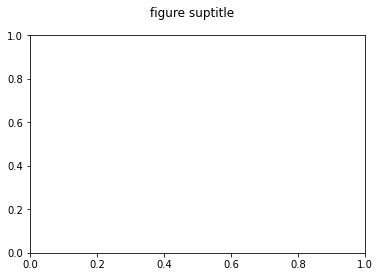

In [2]:
fig, ax = plt.subplots(1,1)
fig.suptitle('figure suptitle')
plt.show()

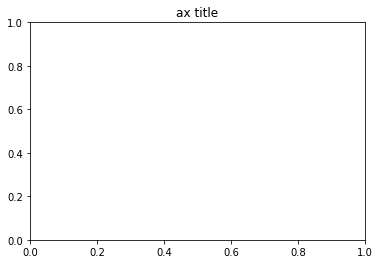

In [3]:
fig, ax = plt.subplots(1,1)
ax.set_title('ax title')
plt.show()

약간의 높낮이가 있다는 차이를 제외하고는 크게 차이가 없어보입니다. 그럼 두 개의 함수를 한번 같이 사용해보겠습니다.

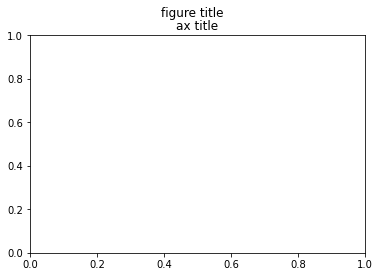

In [4]:
fig, ax = plt.subplots(1,1)
fig.suptitle('figure title')
ax.set_title('ax title')
plt.show()

앞 절에서 이야기했듯이 figure는 ax들을 다루는 더 큰 단위입니다. 그렇기에 한 figure 내의 ax 전체적인 내용을 담는 큰 제목으로 볼 수 있습니다.
즉 ax가 여러 개라면 다음과 같이 내용을 구성할 수 있습니다.

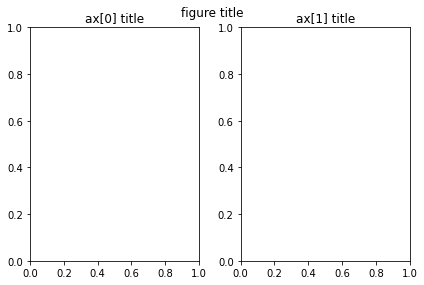

In [5]:
fig, ax = plt.subplots(1,2)
fig.suptitle('figure title')
ax[0].set_title('ax[0] title')
ax[1].set_title('ax[1] title')

plt.tight_layout()
plt.show()

> suptitle의 sup은 super title의 sup을 의미합니다. 여기서 super은 above, 즉 상위라는 의미를 담고 있어 상위 제목이라 생각하면 쉽게 외울 수 있습니다.

### 1-6-2. 축과 레이블

축(axis)은 스케일을 알 수 있는 가장 중요한 정보입니다. 

대다수의 정적인 시각화는 2차원 데카르트 좌표계를 활용하여 데이터를 매핑시킵니다. 
그리고 가로축을 x축(x-axis), 세로축을 y(y-axis)축이라 부릅니다.

그리고 축에는 여러 정보가 담길 수 있습니다. 크게 다음과 같은 정보가 담깁니다.

- 축의 내용(라벨)
- 축의 단위
- 축의 스케일

이번에는 이 중에서도 축의 내용인 라벨(label) 정보를 추가해보겠습니다.

`ax` 객체의 x축 라벨은 `ax.set_xlabel('x축 라벨')`을 사용하여 추가할 수 있습니다.

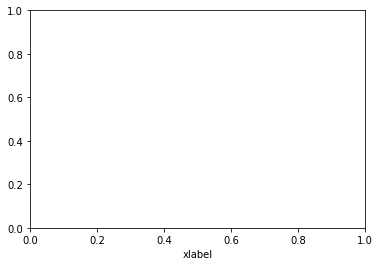

In [6]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('xlabel')
plt.show()

이미 예상하셨겠지만 y축은 `ax.set_ylabel('y축 라벨')`로 추가할 수 있습니다.

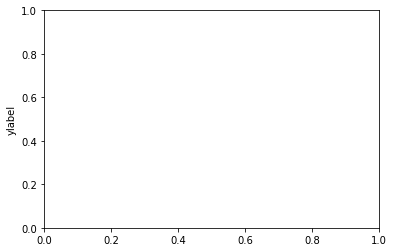

In [7]:
fig, ax = plt.subplots(1,1)
ax.set_ylabel('ylabel')
plt.show()

### 1.6.3 원하는 위치에 텍스트(text, annotation)

이제 plot에서 핵심적인 정보들을 제외한 추가적인 정보를 주는 여러가지 방법을 살펴보겠습니다.
우선 단순하게 임의의 위치에 텍스트를 추가하는 방법부터 알아보겠습니다.

제목과 유사하게 이번에도 figure에 따른 텍스트와 ax에 따른 텍스트가 다릅니다.
figure의 텍스트부터 살펴보겠습니다.

`fig.text(x, y, 텍스트)`는 좌측 하단을 `(0, 0)`, 우측 상단을 `(1, 1)`로 두었을 때 `(x, y)`에 텍스트를 추가합니다.


기본적인 크기 1x1 figure와 ax의 경우, x축과 y축의 범위가 각각 0~1.0으로 설정됩니다.
그래서 figtext에 대한 좌표 개념이 헷갈릴 수 있습니다.

이해를 돕기 위해 x축과 y축의 범위를 `-10`부터 `10`으로 범위를 변경하여 살펴보겠습니다.

축 스케일은 `ax.set_xlim()`과 `ax.set_ylim()`으로 변경할 수 있습니다. 

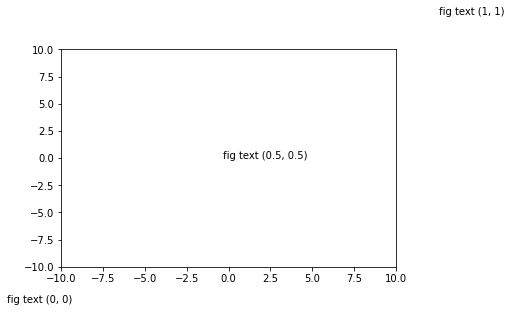

In [8]:
fig, ax = plt.subplots(1,1)

ax.set_xlim(-10, 10) #x축 스케일 변경
ax.set_ylim(-10, 10) #y축 스케일 변경

fig.text(1.0, 1.0, 'fig text (1, 1)')
fig.text(0.5, 0.5, 'fig text (0.5, 0.5)')
fig.text(0, 0, 'fig text (0, 0)')

plt.show()

비교를 위해 3개의 text를 추가해보았는데 축과 figure의 사이즈가 가늠이 안되어 어떻게 위치를 설정하는지 혼란이 올 수 있습니다.

축 정보를 숨기고, tight_layout을 이용하여 ax를 figure에 꽉 맞춰서 시각화해보겠습니다.

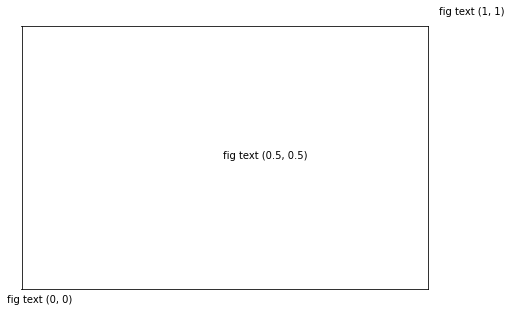

In [9]:
fig, ax = plt.subplots(1,1)

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

fig.text(1.0, 1.0, 'fig text (1, 1)')
fig.text(0.5, 0.5, 'fig text (0.5, 0.5)')
fig.text(0, 0, 'fig text (0, 0)')

ax.xaxis.set_visible(False) #x축 숨기기
ax.yaxis.set_visible(False) #y축 숨기기
plt.tight_layout()

plt.show()

figure는 언제나 ax들의 상위 개념이라 ax의 개수가 변경되더라도 text의 위치는 변함이 없습니다.

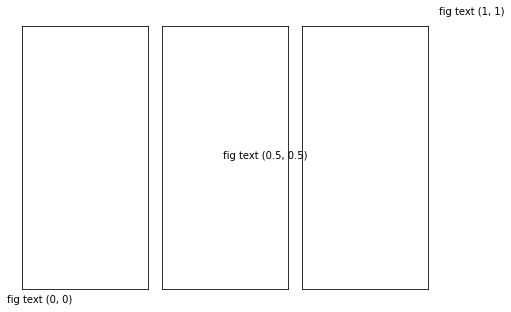

In [10]:
fig, ax = plt.subplots(1,3)
fig.text(1.0, 1.0, 'fig text (1, 1)')
fig.text(0.5, 0.5, 'fig text (0.5, 0.5)')
fig.text(0, 0, 'fig text (0, 0)')

for i in range(3):
    ax[i].xaxis.set_visible(False) 
    ax[i].yaxis.set_visible(False) 

plt.tight_layout()
plt.show()

이번에는 ax에서 text를 살펴보겠습니다.

figure와 거의 유사한 코드로 텍스트를 추가해보겠습니다.

위의 `fig.text` 대신에 `ax.text`로 ax에 직접적으로 추가합니다. 

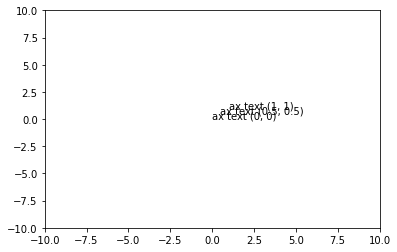

In [14]:
fig, ax = plt.subplots(1,1)

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.text(1.0, 1.0, 'ax text (1, 1)')
ax.text(0.5, 0.5, 'ax text (0.5, 0.5)')
ax.text(0, 0, 'ax text (0, 0)')
plt.show()

그리고 볼 수 있듯이 여기서는 전체 크기의 비율이 아닌 좌표를 기준으로 하는 것을 알 수 있습니다.

그렇기에 ax가 여러개라면 따로 좌표로 관리할 수 있습니다.

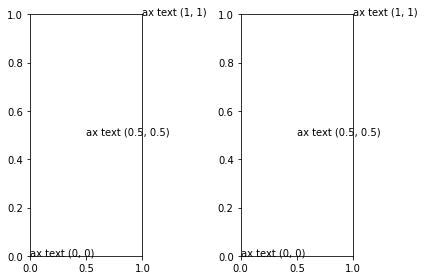

In [13]:
fig, ax = plt.subplots(1, 2)

for i in range(2):
    ax[i].text(1.0, 1.0, 'ax text (1, 1)')
    ax[i].text(0.5, 0.5, 'ax text (0.5, 0.5)')
    ax[i].text(0, 0, 'ax text (0, 0)')

plt.tight_layout()
plt.show()

그렇다면 좌표축이 범주형이라면 어떨까요? 한 번 살펴보겠습니다.

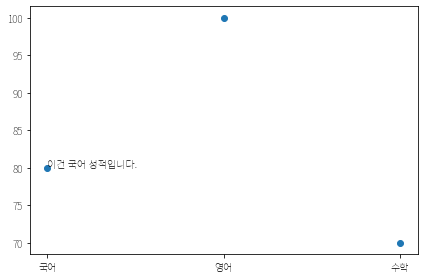

In [26]:
fig, ax = plt.subplots(1, 1)

ax.scatter(['국어', '영어', '수학'], [80, 100, 70])
ax.text('국어', 80, '이건 국어 성적입니다.')

plt.tight_layout()
plt.show()

이런 식으로 범주형의 경우에는 다음과 같이 범주로 매핑하여 텍스트를 추가할 수 있습니다.